# Import Libraries

In [2]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [5]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [7]:
pd.set_option('display.max_columns', None)
loan_data_inputs_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade_woe,home_ownership_woe,addr_state_woe,verification_status_woe,purpose_woe,initial_list_status_woe,loan_amnt_scaled,funded_amnt_scaled,funded_amnt_inv_scaled,int_rate_scaled,installment_scaled,annual_inc_scaled,dti_scaled,delinq_2yrs_scaled,fico_range_low_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,mths_since_last_record_scaled,open_acc_scaled,pub_rec_scaled,revol_bal_scaled,revol_util_scaled,total_acc_scaled,out_prncp_scaled,out_prncp_inv_scaled,total_pymnt_scaled,total_pymnt_inv_scaled,total_rec_prncp_scaled,total_rec_int_scaled,total_rec_late_fee_scaled,recoveries_scaled,collection_recovery_fee_scaled,last_pymnt_amnt_scaled,last_fico_range_high_scaled,last_fico_range_low_scaled,tot_coll_amt_scaled,tot_cur_bal_scaled,open_acc_6m_scaled,open_act_il_scaled,open_il_12m_scaled,open_il_24m_scaled,mths_since_rcnt_il_scaled,total_bal_il_scaled,il_util_scaled,open_rv_12m_scaled,open_rv_24m_scaled,max_bal_bc_scaled,all_util_scaled,total_rev_hi_lim_scaled,inq_fi_scaled,total_cu_tl_scaled,inq_last_12m_scaled,acc_open_past_24mths_scaled,avg_cur_bal_scaled,bc_open_to_buy_scaled,bc_util_scaled,chargeoff_within_12_mths_scaled,delinq_amnt_scaled,mo_sin_old_il_acct_scaled,mo_sin_old_rev_tl_op_scaled,mo_sin_rcnt_rev_tl_op_scaled,mo_sin_rcnt_tl_scaled,mort_acc_scaled,mths_since_recent_bc_scaled,mths_since_recent_bc_dlq_scaled,mths_since_recent_inq_scaled,mths_since_recent_revol_delinq_scaled,num_accts_ever_120_pd_scaled,num_actv_bc_tl_scaled,num_actv_rev_tl_scaled,num_bc_sats_scaled,num_bc_tl_scaled,num_il_tl_scaled,num_op_rev_tl_scaled,num_rev_accts_scaled,num_rev_tl_bal_gt_0_scaled,num_sats_scaled,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,percent_bc_gt_75_scaled,pub_rec_bankruptcies_scaled,tax_liens_scaled,tot_hi_cred_lim_scaled,total_bal_ex_mort_scaled,total_bc_limit_scaled,total_il_high_credit_limit_scaled,emp_length_int_scaled,mths_since_earliest_cr_line_scaled,term_int_scaled,mths_since_issue_d_scaled
99617,110773804,4650.0,4650.0,4650.00,36 months,9.44,148.83,B,B1,0,RENT,13209.0,Verified,Jun-2017,Fully Paid,credit_card,ME,13.00,0.0,May-1995,745.0,749.0,0.0,0.0,0.0,4.0,0.0,5648.0,53.3,12.0,w,0.00,0.00,5187.761169,5187.76,4650.00,537.76,0.00,0.0,0.0,2513.70,739.0,735.0,0.0,5648.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3803.0,53.0,10600.0,0.0,0.0,1.0,2.0,1412.0,2152.0,72.4,0.0,0.0,0.0,265.0,9.0,9.0,1.0,9.0,0.0,9.0,0.0,0.0,2.0,2.0,2.0,7.0,0.0,4.0,11.0

In [8]:
loan_data_targets_train.head()

,good_bad
99617,0
57816,0
47489,0
81869,0
224813,0


In [9]:
loan_data_inputs_train.shape

(312061, 197)

In [10]:
loan_data_targets_train.shape

(312061, 1)

In [11]:
loan_data_targets_train['good_bad'].sum()/loan_data_targets_train['good_bad'].shape[0]

0.15866769637987443

In [12]:
loan_data_inputs_test.shape
#We didn't have the same number of column because I take only the dummy variable I wanted for the model

(78016, 197)

In [13]:
loan_data_targets_test.shape

(78016, 1)

In [14]:
loan_data_targets_test['good_bad'].sum()/loan_data_targets_test['good_bad'].shape[0]

0.15783941755537326

### Selecting the Features

In [16]:
woe_columns = [col for col in loan_data_inputs_train.columns if col.endswith('woe')]
scaled_columns = [col for col in loan_data_inputs_train.columns if col.endswith('scaled')]
inputs_train = loan_data_inputs_train.loc[: , woe_columns + scaled_columns]

# PD Model Estimation

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [20]:
reg = LogisticRegression(solver='saga', max_iter=2000)
# We create an instance of an object from the 'LogisticRegression' class.
# The solver saga use the Stochastic Average Gradient (SAGA) Method which is suitable for very large datasets and supports L1, L2, and elasticnet regularizations. Faster for large datasets and high-dimensional problems.

In [21]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [22]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\Pierre Pro\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000, solver='saga')

In [23]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([11.04610024])

In [24]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[-1.11407538e+00, -5.89776047e-02, -5.50900731e-01,
        -1.08811857e-01,  7.14007438e-02,  3.77396754e-03,
         1.49522802e+01,  1.86876188e+01,  1.76391277e+01,
        -1.82656454e+00,  7.91165961e+00, -1.11924293e-01,
         1.22466287e+00, -4.71754109e-01,  4.61899220e-01,
         4.62589737e-01,  4.47318350e-01,  6.95210873e-02,
         3.02312288e-01, -2.08140509e-01,  1.43735952e-01,
         2.28419281e-02, -4.23851105e-01,  8.39251342e-01,
        -2.29894473e+01, -2.30108799e+01, -1.44949464e+01,
        -1.44142090e+01, -4.18385502e+01,  1.28660432e+01,
         1.44053564e+01,  1.07495876e+01,  1.02117774e+01,
        -1.79327009e+01, -1.74298761e+01, -7.53904323e-02,
         3.83977097e-02, -2.24643618e-01,  2.90643863e-01,
        -8.59923899e-01,  1.18551607e+00,  6.87814209e-01,
         3.72873644e-01, -3.75788283e-01,  3.28743681e-01,
        -4.16053476e-02,  3.83122604e-01, -1.05513442e+00,
         2.41094613e-01,  1.02466280e-01,  3.08498355e-0

In [25]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [26]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,11.046100
1,grade_woe,-1.114075
2,home_ownership_woe,-0.058978
3,addr_state_woe,-0.550901
4,verification_status_woe,-0.108812
5,purpose_woe,0.071401
6,initial_list_status_woe,0.003774
7,loan_amnt_scaled,14.952280
8,funded_amnt_scaled,18.687619
9,funded_amnt_inv_scaled,17.639128


## Build a Logistic Regression Model with P-Values

In [28]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        if 'max_iter' not in kwargs:
            kwargs['max_iter'] = 1000
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

        

# 2nd solution for calculate the P-value
class LogisticRegression_with_p_values2:
    
    def __init__(self, *args, **kwargs):
        if 'max_iter' not in kwargs:
            kwargs['max_iter'] = 1000
        self.model = LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        # Ajuster le modèle
        self.model.fit(X, y.values.ravel())  # Utilisez .ravel() pour aplatir la dataframe en vecteur
        
        # Convertir les données pour statsmodels
        X_sm = sm.add_constant(X)
        model_sm = sm.Logit(y, X_sm)
        result = model_sm.fit()
        
        # Obtenir les p-values
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = result.pvalues[1:]  # Exclure l'interception

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ajouter une constante à X
X_sm = sm.add_constant(inputs_train)

# Calculer le VIF pour chaque variable
vif = pd.DataFrame()
vif["Variable"] = X_sm.columns
vif["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]

print(vif) 

                                 Variable           VIF
0                                   const  4.187261e+02
1                               grade_woe  8.317378e+00
2                      home_ownership_woe  1.565947e+00
3                          addr_state_woe  1.008843e+00
4                 verification_status_woe  1.165775e+00
5                             purpose_woe  1.045564e+00
6                 initial_list_status_woe  1.299308e+00
7                        loan_amnt_scaled  1.594312e+03
8                      funded_amnt_scaled  5.269432e+03
9                  funded_amnt_inv_scaled  3.641138e+03
10                        int_rate_scaled  1.010299e+01
11                     installment_scaled  5.109445e+01
12                      annual_inc_scaled  1.099195e+00
13                             dti_scaled  1.306383e+00
14                     delinq_2yrs_scaled  2.267257e+00
15                  fico_range_low_scaled  5.197123e+06
16                 fico_range_high_scaled  5.197

Analyzing the results of the Variance Inflation Factor (VIF), here's what I observe:

1. Constant (const):
The constant has a very high VIF (418.7261), but this is normal. The constant in the model represents the intercept, and its VIF generally has no direct impact on the multicollinearity between the explanatory variables. There's no need to worry about the constant's high FIV.

2. Variables with very high FIVs :
Some variables have extremely high VIFs, which is a strong indicator of multicollinearity. These variables could be redundant or overly correlated with others in the model. Here are the most problematic ones:

fico_range_low_scaled and fico_range_high_scaled: These two variables have extremely high VIFs, around 5,197,000. This indicates that they are almost perfectly correlated (as expected, since they probably represent similar credit score information). We will have to remove one of the two to avoid multicollinearity.

out_prncp_scaled and out_prncp_inv_scaled: Both variables have a VIF around 422.000. Same case.

total_pymnt_scaled and total_rec_prncp_scaled: These variables have extremely high VIFs (13,000,000 for total_pymnt_scaled and 1.8e13 for total_rec_prncp_scaled). Same case.

3. Variables with moderately high FIVs :
Some variables have high but moderate VIFs compared with extreme cases:

loan_amnt_scaled (1,594.312)
funded_amnt_scaled (5,269,432)
funded_amnt_inv_scaled (3,641.138)
These variables also show a certain degree of multicollinearity, as they are all linked to loan amounts. I will only keep loan_amnt_scaled.

4. Variables with reasonable FIVs :
The majority of other variables have FIVs below 10, which is generally acceptable. Variables such as grade_woe (8.317), home_ownership_woe (1.565), and others, have relatively low levels of multicollinearity.

5. Additional analysis of variables of interest :
VIF around 10 for int_rate_scaled (10.1): Although this is just above the threshold of 10, it might not be critical at first.

We will remove : 
- fico_range_low_scaled
- out_prncp_scaled
- total_pymnt_scaled
- funded_amnt_scaled
- funded_amnt_inv_scaled

In [31]:
inputs_train = inputs_train.drop(['fico_range_low_scaled', 'out_prncp_scaled', 'total_pymnt_scaled', 'funded_amnt_scaled', 'funded_amnt_inv_scaled', 'total_rec_int_scaled', 'total_rec_late_fee_scaled', 'recoveries_scaled', 'collection_recovery_fee_scaled', 'tot_cur_bal_scaled', 'num_actv_rev_tl_scaled', 'num_il_tl_scaled',  'num_op_rev_tl_scaled', 'num_rev_accts_scaled', 'num_rev_tl_bal_gt_0_scaled', 'num_sats_scaled', 'tot_hi_cred_lim_scaled','total_bal_ex_mort_scaled','total_bc_limit_scaled','total_il_high_credit_limit_scaled'], axis=1)


In [32]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [33]:
reg = LogisticRegression_with_p_values2(solver='saga')
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [34]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

Optimization terminated successfully.
         Current function value: 0.050771
         Iterations 15


In [35]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,11.778001
1,grade_woe,-1.268130
2,home_ownership_woe,-0.078266
3,addr_state_woe,-0.601289
4,verification_status_woe,-0.145480
5,purpose_woe,0.039219
6,initial_list_status_woe,0.016273
7,loan_amnt_scaled,34.349042
8,int_rate_scaled,-2.500238
9,installment_scaled,14.770115


In [36]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [37]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [38]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [39]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,11.778001,NaN
1,grade_woe,-1.268130,1.686067e-25
2,home_ownership_woe,-0.078266,3.090715e-03
3,addr_state_woe,-0.601289,5.375142e-07
4,verification_status_woe,-0.145480,3.490748e-01
5,purpose_woe,0.039219,4.272346e-01
6,initial_list_status_woe,0.016273,2.466667e-01
7,loan_amnt_scaled,34.349042,0.000000e+00
8,int_rate_scaled,-2.500238,4.468735e-67
9,installment_scaled,14.770115,1.875584e-141


We are going to remove some features, the coefficients for all or almost all of the variables for which are not tatistically significant.

To decide which columns to delete, look primarily at the p-values. If a p-value is greater than 0.05, this indicates that the coefficient is not statistically significant (at the 95% confidence level). You might consider deleting these variables, as they don't provide sufficient information for the model.

Columns to delete as a priority :
Columns with p-values greater than 0.05 are candidates for deletion. Here is a list of columns whose coefficients are not statistically significant:

- verification_status_woe (p-value = 0.349)
- purpose_woe (p-value = 0.427)
- initial_list_status_woe (p-value = 0.246)
- dti_scaled (p-value = 0.269)
- delinq_2yrs_scaled (p-value = 0.596)
- open_acc_scaled (p-value = 0.163)
- pub_rec_scaled (p-value = 0.958)
- total_acc_scaled (p-value = 0.784)
- tot_coll_amt_scaled (p-value = 0.630)
- open_acc_6m_scaled (p-value = 0.614)
- open_act_il_scaled (p-value = 0.257)
- open_il_24m_scaled (p-value = 0.935)
- max_bal_bc_scaled (p-value = 0.306)
- all_util_scaled (p-value = 0.362)
- inq_fi_scaled (p-value = 0.537)
- inq_last_12m_scaled (p-value = 0.333)
- acc_open_past_24mths_scaled (p-value = 0.420)
- avg_cur_bal_scaled (p-value = 0.066)
- chargeoff_within_12_mths_scaled (p-value = 0.665)
- delinq_amnt_scaled (p-value = 0.964)
- open_rv_12m_scaled (p-value = 0.588)
- open_rv_24m_scaled (p-value = 0.950)
- mths_since_rcnt_il_scaled (p-value = 0.204)
- mort_acc_scaled (p-value = 0.121)
- mths_since_earliest_cr_line_scaled (p-value = 0.377)
- mths_since_recent_inq_scaled (p-value = 0.959)
- pub_rec_bankruptcies_scaled (p-value = 0.878)
- tax_liens_scaled (p-value = 0.776)

In [41]:
# List of columns to drop
columns_to_drop = [
    'verification_status_woe',
    'purpose_woe',
    'initial_list_status_woe',
    'dti_scaled',
    'delinq_2yrs_scaled',
    'open_acc_scaled',
    'pub_rec_scaled',
    'total_acc_scaled',
    'tot_coll_amt_scaled',
    'open_acc_6m_scaled',
    'open_act_il_scaled',
    'open_il_24m_scaled',
    'max_bal_bc_scaled',
    'all_util_scaled',
    'inq_fi_scaled',
    'inq_last_12m_scaled',
    'acc_open_past_24mths_scaled',
    'avg_cur_bal_scaled',
    'chargeoff_within_12_mths_scaled',
    'delinq_amnt_scaled',
    'open_rv_12m_scaled',
    'open_rv_24m_scaled',
    'mths_since_rcnt_il_scaled',
    'mort_acc_scaled',
    'mths_since_earliest_cr_line_scaled',
    'mths_since_recent_inq_scaled',
    'pub_rec_bankruptcies_scaled',
    'tax_liens_scaled'
]

# Drop the columns
inputs_train = inputs_train.drop(columns=columns_to_drop, axis=1)


In [42]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values2()
reg2.fit(inputs_train, loan_data_targets_train)

Optimization terminated successfully.
         Current function value: 0.050821
         Iterations 15


In [43]:
feature_name = inputs_train.columns.values

In [44]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,11.915627
1,grade_woe,-0.822908
2,home_ownership_woe,-0.040866
3,addr_state_woe,-0.577811
4,loan_amnt_scaled,33.660171
5,int_rate_scaled,-1.876621
6,installment_scaled,14.969705
7,annual_inc_scaled,-0.072963
8,fico_range_high_scaled,0.559415
9,inq_last_6mths_scaled,0.260313


In [45]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,11.915627,NaN
1,grade_woe,-0.822908,1.344622e-24
2,home_ownership_woe,-0.040866,6.405376e-02
3,addr_state_woe,-0.577811,7.013379e-07
4,loan_amnt_scaled,33.660171,0.000000e+00
5,int_rate_scaled,-1.876621,2.608867e-66
6,installment_scaled,14.969705,3.741699e-140
7,annual_inc_scaled,-0.072963,5.389467e-03
8,fico_range_high_scaled,0.559415,2.820488e-03
9,inq_last_6mths_scaled,0.260313,2.930184e-02


In [46]:
feature_name = inputs_train.columns.values
feature_name

array(['grade_woe', 'home_ownership_woe', 'addr_state_woe',
       'loan_amnt_scaled', 'int_rate_scaled', 'installment_scaled',
       'annual_inc_scaled', 'fico_range_high_scaled',
       'inq_last_6mths_scaled', 'mths_since_last_delinq_scaled',
       'mths_since_last_record_scaled', 'revol_bal_scaled',
       'revol_util_scaled', 'out_prncp_inv_scaled',
       'total_pymnt_inv_scaled', 'total_rec_prncp_scaled',
       'last_pymnt_amnt_scaled', 'last_fico_range_high_scaled',
       'last_fico_range_low_scaled', 'open_il_12m_scaled',
       'total_bal_il_scaled', 'il_util_scaled', 'total_rev_hi_lim_scaled',
       'total_cu_tl_scaled', 'bc_open_to_buy_scaled', 'bc_util_scaled',
       'mo_sin_old_il_acct_scaled', 'mo_sin_old_rev_tl_op_scaled',
       'mo_sin_rcnt_rev_tl_op_scaled', 'mo_sin_rcnt_tl_scaled',
       'mths_since_recent_bc_scaled', 'mths_since_recent_bc_dlq_scaled',
       'mths_since_recent_revol_delinq_scaled',
       'num_accts_ever_120_pd_scaled', 'num_actv_bc_tl_scale

In [47]:
reg2

In [48]:
import pickle

In [49]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [50]:
# Convert numpy array to DataFrame
feature_df = pd.DataFrame(feature_name)

# Export to CSV
feature_df.to_csv('feature_pd.csv', index=False)

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [53]:
loan_data_inputs_test.shape

(78016, 197)

In [54]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test = loan_data_inputs_test.loc[: , feature_name]

In [55]:
inputs_test.shape

(78016, 46)

In [56]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [57]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [59]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[2.84724688e-09, 9.99999997e-01],
       [9.38974036e-01, 6.10259641e-02],
       [9.94485481e-01, 5.51451872e-03],
       ...,
       [9.99606207e-01, 3.93793384e-04],
       [9.55207637e-05, 9.99904479e-01],
       [9.63485550e-01, 3.65144502e-02]])

In [60]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([9.99999997e-01, 6.10259641e-02, 5.51451872e-03, ...,
       3.93793384e-04, 9.99904479e-01, 3.65144502e-02])

In [61]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [62]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([9.99999997e-01, 6.10259641e-02, 5.51451872e-03, ...,
       3.93793384e-04, 9.99904479e-01, 3.65144502e-02])

In [63]:
loan_data_targets_test_temp = loan_data_targets_test

In [64]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [65]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [66]:
df_actual_predicted_probs.shape

(78016, 2)

In [67]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [68]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [69]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
277711,1,1.000000
304277,0,0.061026
249687,0,0.005515
162712,0,0.157756
123887,0,0.000183


### Accuracy and Area under the Curve

In [71]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [72]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,65470,232
1,1082,11232


In [73]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.839187,0.002974
1,0.013869,0.143970


In [74]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.9831573010664478

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

In [76]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.       , 0.       , 0.       , ..., 0.9356184, 0.9356184,
        1.       ]),
 array([0.        , 0.00503492, 0.00820205, ..., 0.99991879, 1.        ,
        1.        ]),
 array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
        7.05850995e-07, 7.05625840e-07, 7.44682102e-14]))

In [77]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

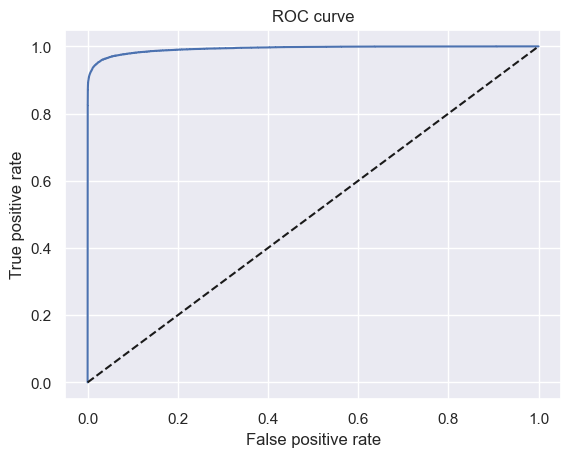

In [79]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [80]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.9930006068763522

### Gini and Kolmogorov-Smirnov

In [82]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba', ascending=False)
# Sorts a dataframe by the values of a specific column.

In [83]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
230495,1,1.0,1
337586,1,1.0,1
124,1,1.0,1
328940,1,1.0,1
101915,1,1.0,1


In [84]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
181797,0,1.107717e-13,0
309202,0,1.003196e-13,0
47177,0,1.000319e-13,0
238579,0,9.066060e-14,0
257878,0,7.446821e-14,0


In [85]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [86]:
#df_actual_predicted_probs = df_actual_predicted_probs.drop('level_0', axis=1)
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,230495,1,1.0,1
1,337586,1,1.0,1
2,124,1,1.0,1
3,328940,1,1.0,1
4,101915,1,1.0,1


In [87]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [88]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good
0,230495,1,1.0,1,1,1,0
1,337586,1,1.0,1,2,2,0
2,124,1,1.0,1,3,3,0
3,328940,1,1.0,1,4,4,0
4,101915,1,1.0,1,5,5,0


In [89]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [90]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,230495,1,1.0,1,1,1,0,0.000013,0.000081,0.0
1,337586,1,1.0,1,2,2,0,0.000026,0.000162,0.0
2,124,1,1.0,1,3,3,0,0.000038,0.000244,0.0
3,328940,1,1.0,1,4,4,0,0.000051,0.000325,0.0
4,101915,1,1.0,1,5,5,0,0.000064,0.000406,0.0


In [91]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
78011,181797,0,1.107717e-13,0,78012,12314,65698,0.999949,1.0,0.999939
78012,309202,0,1.003196e-13,0,78013,12314,65699,0.999962,1.0,0.999954
78013,47177,0,1.000319e-13,0,78014,12314,65700,0.999974,1.0,0.999970
78014,238579,0,9.066060e-14,0,78015,12314,65701,0.999987,1.0,0.999985
78015,257878,0,7.446821e-14,0,78016,12314,65702,1.000000,1.0,1.000000


Text(0.5, 1.0, 'Gini')

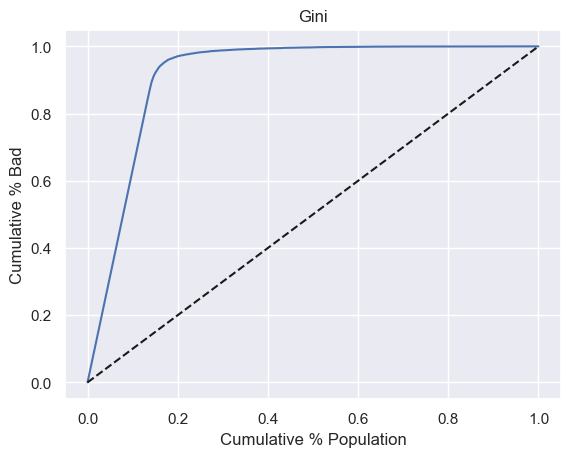

In [92]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [93]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.9860012137527043

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

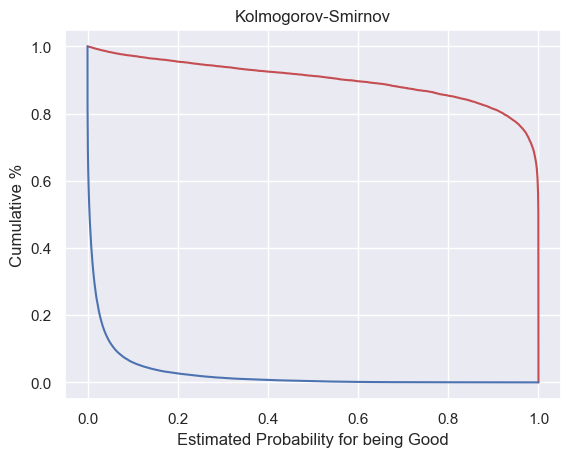

In [94]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [95]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.9291095036192052

# Monitoring with the data after 2018

In [97]:
# Here we import the new data.
loan_data_backup = pd.read_csv('loan_data_sample_after_2018.csv')

### Explore Data

In [99]:
loan_data = loan_data_backup.copy()

In [100]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [101]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d
0,145077262,40000.0,40000.0,39975.0,60 months,12.98,909.72,B,B5,< 1 year,MORTGAGE,584000.0,Not Verified,Dec-2018,Current,debt_consolidation,OR,7.47,0.0,Dec-2011,705.0,709.0,1.0,NaN,NaN,17.0,0.0,30588.0,41.7,20.0,f,38553.30,38529.20,2714.74,2713.04,1446.70,1268.04,0.0,0.0,0.0,909.72,704.0,700.0,198.0,621886.0,4.0,5.0,1.0,3.0,6.0,177953.0,56.0,3.0,4.0,12000.0,44.0,73400.0,1.0,5.0,4.0,8.0,36582.0,35351.0,45.3,0.0,0.0,44.0,84.0,3.0,3.0,1.0,3.0,NaN,3.0,NaN,0.0,5.0,6.0,10.0,11.0,6.0,11.0,13.0,6.0,17.0,0.0,0.0,0.0,5.0,100.0,20.0,0.0,0.0,711268.0,208541.0,64600.0,221868.0,0.0,2011-12-01,85.0,60,2018-12-01,1.0
1,127053376,8400.0,8400.0,8400.0,36 months,9.44,268.85,B,B1,< 1 year,RENT,50000.0,Not Verified,Jan-2018,Current,credit_card,TX,8.76,0.0,Jan-2008,675.0,679.0,0.0,NaN,NaN,10.0,0.0,12196.0,61.0,10.0,f,5411.40,5411.40,3759.49,3759.49,2988.60,770.89,0.0,0.0,0.0,268.85,759.0,755.0,0.0,12196.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,5.0,2879.0,61.0,20000.0,0.0,0.0,0.0,5.0,1220.0,2474.0,76.7,0.0,0.0,NaN,120.0,7.0,7.0,0.0,7.0,NaN,17.0,NaN,0.0,4.0,9.0,4.0,4.0,0.0,10.0,10.0,9.0,10.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,20000.0,12196.0,10600.0,0.0,0.0,2008-01-01,132.0,36,2018-01-01,12.0
2,127277889,40000.0,40000.0,40000.0,36 months,6.08,1218.33,A,A2,10+ years,MORTGAGE,550000.0,Not Verified,Jan-2018,Current,home_improvement,CA,12.11,0.0,Oct-1996,715.0,719.0,0.0,40.0,NaN,16.0,0.0,48093.0,51.1,52.0,w,25302.80,25302.80,17029.60,17029.60,14697.20,2332.40,0.0,0.0,0.0,1218.33,714.0,710.0,0.0,799317.0,1.0,5.0,2.0,5.0,7.0,78266.0,84.0,0.0,0.0,26575.0,59.0,94100.0,2.0,0.0,3.0,7.0,53288.0,45207.0,51.5,0.0,0.0,159.0,172.0,36.0,3.0,8.0,61.0,NaN,4.0,NaN,1.0,5.0,5.0,8.0,12.0,25.0,9.0,17.0,5.0,16.0,0.0,0.0,0.0,3.0,98.1,14.3,0.0,0.0,916580.0,161454.0,93300.0,142095.0,10.0,1996-10-01,267.0,36,2018-01-01,12.0
3,143381435,10000.0,10000.0,10000.0,36 months,16.91,356.08,C,C5,NaN,MORTGAGE,65000.0,Not Verified,Nov-2018,Current,debt_consolidation,MA,18.09,0.0,Aug-1976,660.0,664.0,0.0,NaN,98.0,17.0,1.0,26312.0,67.5,19.0,w,9120.98,9120.98,1414.93,1414.93,879.02,535.91,0.0,0.0,0.0,356.08,679.0,675.0,0.0,206756.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,2.0,3886.0,68.0,39000.0,0.0,1.0,1.0,2.0,12162.0,5678.0,71.9,0.0,0.0,NaN,507.0,15.0,15.0,1.0,20.0,NaN,12.0,NaN,0.0,8.0,14.0,8.0,8.0,0.0,16.0,18.0,14.0,17.0,0.0,0.0,0.0,0.0,100.0,87.5,1.0,0.0,238806.0,26312.0,20200.0,0.0,NaN,1976-08-01,509.0,36,2018-11-01,2.0
4,140864921,29725.0,29725.0,29725.0,36 months,14.47,1022.73,C,C2,9 years,MORTGAGE,150000.0,Not Verified,Sep-

In [102]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109923 entries, 0 to 109922
Columns: 103 entries, id to mths_since_issue_d
dtypes: float64(87), int64(2), object(14)
memory usage: 86.4+ MB


***

# Population Stability Index: Preprocessing

In [105]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)', 'In Grace Period']), 1, 0)
# We create a new variable that has the value of '1' if a condition is met, and the value of '0' if it is not met.

In [106]:
#####
df_inputs_prepr = loan_data.drop('good_bad', axis = 1)
df_targets_prepr = loan_data['good_bad']
#####
#df_inputs_prepr = loan_data_inputs_test
##df_targets_prepr = loan_data_targets_test

In [107]:
# WoE function for discrete unordered variables

"""
    This function calculates the Weight of Evidence (WoE) for a categorical variable.
    The WoE is calculated as the log ratio between the proportion of 'good' and 'bad' in each category.
    
    Parameters:
    df: pandas DataFrame containing the data
    discrete_variable_name: string, the name of the categorical variable to be transformed
    good_bad_variable_df: pandas Series or DataFrame, the binary target variable ('good' = 0, 'bad' = 1)
    
    Returns:
    pandas DataFrame with WoE values for each category
"""

def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [108]:
discrete_columns = ['grade', 'home_ownership','addr_state','verification_status', 'purpose', 'initial_list_status']

for col in discrete_columns:
    df_temp = woe_discrete(df_inputs_prepr, col, df_targets_prepr)
    woe_dict = dict(zip(df_temp[col], df_temp['WoE']))
    df_inputs_prepr[col + '_woe'] = df_inputs_prepr[col].map(woe_dict).fillna(-1)

from sklearn.preprocessing import MinMaxScaler
# Select columns that end with 'woe'
woe_columns = [col for col in df_inputs_prepr.columns if col.endswith('woe')]

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Loop through each column in the woe_columns list
for col in woe_columns:
    # Replace positive infinity with the maximum finite value in the column
    df_inputs_prepr[col] = df_inputs_prepr[col].replace(np.inf, df_inputs_prepr[col][df_inputs_prepr[col] != np.inf].max())
    
    # Replace negative infinity with the minimum finite value in the column
    df_inputs_prepr[col] = df_inputs_prepr[col].replace(-np.inf, df_inputs_prepr[col][df_inputs_prepr[col] != -np.inf].min())
    
    # Optionally, fill NaN values with 0 or another strategy
    df_inputs_prepr[col] = df_inputs_prepr[col].fillna(0)


# Apply the scaler to the selected columns
df_inputs_prepr[woe_columns] = scaler.fit_transform(df_inputs_prepr[woe_columns])


In [109]:
def cat_num_features(df):
    
    '''
        Utility Function to get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'earliest_cr_line_date', 'issue_d_date']


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns.values if feature not in catf and feature != 'good_bad']
    
    return (catf, numf)  

In [110]:
catf, numf = cat_num_features(loan_data)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numerical columns, create new columns with "_scaled" suffix
scaled_columns = pd.DataFrame(scaler.fit_transform(df_inputs_prepr[numf]), 
                              columns=[col + '_scaled' for col in numf],
                              index=df_inputs_prepr.index)

# Concatenate the original DataFrame with the scaled columns
df_inputs_prepr = pd.concat([df_inputs_prepr, scaled_columns], axis=1)

### Preprocessing the test dataset

In [112]:
loan_data_inputs_2018 = df_inputs_prepr
loan_data_targets_2018 = df_targets_prepr

In [113]:
loan_data_inputs_2018.columns.values

array(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
     

In [114]:
loan_data_inputs_2018.shape

(109923, 197)

In [115]:
loan_data_targets_2018.shape

(109923,)

In [116]:
loan_data_inputs_2018.to_csv('loan_data_inputs_2018.csv')
loan_data_targets_2018.to_csv('loan_data_targets_2018.csv')

In [117]:
woe_columns = [col for col in loan_data_inputs_2018.columns if col.endswith('woe')]
scaled_columns = [col for col in loan_data_inputs_2018.columns if col.endswith('scaled')]
inputs_train_2018 = loan_data_inputs_2018.loc[: , woe_columns + scaled_columns]

In [118]:
inputs_train_2018 = inputs_train_2018.drop(['fico_range_low_scaled', 'out_prncp_scaled', 'total_pymnt_scaled', 'funded_amnt_scaled', 'funded_amnt_inv_scaled', 'total_rec_int_scaled', 'total_rec_late_fee_scaled', 'recoveries_scaled', 'collection_recovery_fee_scaled', 'tot_cur_bal_scaled', 'num_actv_rev_tl_scaled', 'num_il_tl_scaled',  'num_op_rev_tl_scaled', 'num_rev_accts_scaled', 'num_rev_tl_bal_gt_0_scaled', 'num_sats_scaled', 'tot_hi_cred_lim_scaled','total_bal_ex_mort_scaled','total_bc_limit_scaled','total_il_high_credit_limit_scaled'], axis=1)

In [119]:
# List of columns to drop
columns_to_drop = [
    'verification_status_woe',
    'purpose_woe',
    'initial_list_status_woe',
    'dti_scaled',
    'delinq_2yrs_scaled',
    'open_acc_scaled',
    'pub_rec_scaled',
    'total_acc_scaled',
    'tot_coll_amt_scaled',
    'open_acc_6m_scaled',
    'open_act_il_scaled',
    'open_il_24m_scaled',
    'max_bal_bc_scaled',
    'all_util_scaled',
    'inq_fi_scaled',
    'inq_last_12m_scaled',
    'acc_open_past_24mths_scaled',
    'avg_cur_bal_scaled',
    'chargeoff_within_12_mths_scaled',
    'delinq_amnt_scaled',
    'open_rv_12m_scaled',
    'open_rv_24m_scaled',
    'mths_since_rcnt_il_scaled',
    'mort_acc_scaled',
    'mths_since_earliest_cr_line_scaled',
    'mths_since_recent_inq_scaled',
    'pub_rec_bankruptcies_scaled',
    'tax_liens_scaled'
]

# Drop the columns
inputs_train_2018 = inputs_train_2018.drop(columns=columns_to_drop, axis=1)

In [120]:
inputs_train_2018_w_intercept = inputs_train_2018
inputs_train_2018_w_intercept.insert(0, 'Intercept', 1)

In [121]:
inputs_train_2018.head()

,Intercept,grade_woe,home_ownership_woe,addr_state_woe,loan_amnt_scaled,int_rate_scaled,installment_scaled,annual_inc_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,mths_since_last_record_scaled,revol_bal_scaled,revol_util_scaled,out_prncp_inv_scaled,total_pymnt_inv_scaled,total_rec_prncp_scaled,last_pymnt_amnt_scaled,last_fico_range_high_scaled,last_fico_range_low_scaled,open_il_12m_scaled,total_bal_il_scaled,il_util_scaled,total_rev_hi_lim_scaled,total_cu_tl_scaled,bc_open_to_buy_scaled,bc_util_scaled,mo_sin_old_il_acct_scaled,mo_sin_old_rev_tl_op_scaled,mo_sin_rcnt_rev_tl_op_scaled,mo_sin_rcnt_tl_scaled,mths_since_recent_bc_scaled,mths_since_recent_bc_dlq_scaled,mths_since_recent_revol_delinq_scaled,num_accts_ever_120_pd_scaled,num_actv_bc_tl_scaled,num_bc_sats_scaled,num_bc_tl_scaled,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,percent_bc_gt_75_scaled,emp_length_int_scaled,term_int_scaled,mths_since_issue_d_scaled
0,1,0.684753,0.794341,0.392638,1.000000,0.298676,0.550452,0.070788,0.241935,0.2,NaN,NaN,0.027475,0.257249,0.963230,0.052524,0.036168,0.022165,0.828235,0.828402,0.166667,0.121354,0.174455,0.043683,0.128205,0.106092,0.263219,0.052375,0.100122,0.007853,0.007853,0.004688,NaN,NaN,0.000000,0.10,0.169492,0.166667,0.0,0.0,0.0,0.192308,1.000,0.200,0.0,1.0,0.000000
1,1,0.684753,0.000000,0.155862,0.189744,0.160826,0.149397,0.006061,0.080645,0.0,NaN,NaN,0.010955,0.376311,0.135285,0.072783,0.074715,0.006550,0.892941,0.893491,0.000000,0.000000,NaN,0.011903,0.000000,0.007425,0.445671,NaN,0.144078,0.018325,0.018325,0.010938,NaN,NaN,0.000000,0.08,0.067797,0.060606,0.0,0.0,0.0,0.038462,1.000,0.500,0.0,0.0,1.000000
2,1,1.000000,0.794341,0.133075,1.000000,0.029984,0.743579,0.066667,0.295699,0.0,0.176991,NaN,0.043199,0.315238,0.632570,0.329690,0.367430,0.029684,0.840000,0.840237,0.333333,0.053373,0.261682,0.056002,0.000000,0.135671,0.299245,0.192448,0.207570,0.094241,0.007853,0.095313,NaN,NaN,0.017241,0.10,0.135593,0.181818,0.0,0.0,0.0,0.115385,0.981,0.143,1.0,0.0,1.000000
3,1,0.515043,0.794341,0.148312,0.230769,0.451713,0.203985,0.007879,0.000000,0.0,NaN,0.782258,0.023634,0.416410,0.228024,0.027393,0.021976,0.008676,0.798824,0.798817,0.000000,0.000000,NaN,0.023210,0.025641,0.017040,0.417780,NaN,0.616606,0.039267,0.039267,0.031250,NaN,NaN,0.000000,0.16,0.135593,0.121212,0.0,0.0,0.0,0.000000,1.000,0.875,NaN,0.0,0.090909
4,1,0.515043,0.794341,0.271390,0.736538,0.356698,0.621173,0.018182,0.456989,0.2,NaN,0.814516,0.002610,0.091919,0.640428,0.118336,0.102697,0.024918,0.804706,0.804734,0.166667,0.046290,0.214953,0.011605,0.128205,0.003283,0.422429,0.293544,0.286935,0.089005,0.005236,0.232813,NaN,NaN,0.000000,0.02,0.016949,0.045455,0.0,0.0,0.0,0.076923,1.000,0.000,0.9,0.0,0.272727


In [122]:
inputs_train.head()

,grade_woe,home_ownership_woe,addr_state_woe,loan_amnt_scaled,int_rate_scaled,installment_scaled,annual_inc_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,mths_since_last_record_scaled,revol_bal_scaled,revol_util_scaled,out_prncp_inv_scaled,total_pymnt_inv_scaled,total_rec_prncp_scaled,last_pymnt_amnt_scaled,last_fico_range_high_scaled,last_fico_range_low_scaled,open_il_12m_scaled,total_bal_il_scaled,il_util_scaled,total_rev_hi_lim_scaled,total_cu_tl_scaled,bc_open_to_buy_scaled,bc_util_scaled,mo_sin_old_il_acct_scaled,mo_sin_old_rev_tl_op_scaled,mo_sin_rcnt_rev_tl_op_scaled,mo_sin_rcnt_tl_scaled,mths_since_recent_bc_scaled,mths_since_recent_bc_dlq_scaled,mths_since_recent_revol_delinq_scaled,num_accts_ever_120_pd_scaled,num_actv_bc_tl_scaled,num_bc_sats_scaled,num_bc_tl_scaled,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,percent_bc_gt_75_scaled,emp_length_int_scaled,term_int_scaled,mths_since_issue_d_scaled
99617,0.684812,0.177957,1.000000,0.102792,0.160499,0.075997,0.000217,0.542986,0.000000,0.000000,0.0,0.002199,0.288732,0.000000,0.082525,0.116250,0.060640,0.869412,0.869822,0.00,0.000000,0.000000,0.00106,0.000000,0.004920,0.283699,0.000000,0.265265,0.022901,0.038136,0.014754,0.000000,0.000000,0.000000,0.042553,0.032787,0.102941,0.0,0.0,0.0,0.066667,1.000,0.500,0.0,0.0,0.047619
57816,0.684812,1.000000,0.286117,0.238579,0.197507,0.179470,0.001239,0.361991,0.107143,0.318182,0.0,0.004161,0.099675,0.000000,0.141236,0.250000,0.008083,0.834118,0.834320,0.00,0.000000,0.000000,0.00100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000,0.4,0.0,0.928571
47489,0.465864,1.000000,1.000000,0.035533,0.376704,0.029173,0.000410,0.361991,0.000000,0.443182,0.0,0.003660,0.231311,0.000000,0.036792,0.050000,0.032419,0.863529,0.863905,0.04,0.008932,0.266254,0.00220,0.009009,0.011980,0.231583,0.196133,0.402402,0.005089,0.008475,0.013115,0.400000,0.443182,0.029412,0.085106,0.065574,0.132353,0.0,0.0,0.0,0.133333,0.900,0.250,1.0,0.0,0.071429
81869,0.465864,1.000000,0.270120,1.000000,0.284379,0.777846,0.002279,0.407240,0.000000,0.392045,0.0,0.017225,0.243770,0.564354,0.427090,0.508454,0.033953,0.804706,0.804734,0.00,0.052049,0.204334,0.00915,0.000000,0.096329,0.177116,0.175414,0.352352,0.025445,0.042373,0.042623,0.000000,0.000000,0.058824,0.234043,0.196721,0.220588,0.0,0.0,0.0,0.033333,0.933,0.417,1.0,0.0,0.039683
224813,0.684812,1.000000,0.205355,0.492386,0.149981,0.363864,0.001475,0.180995,0.000000,0.011364,0.0,0.000983,0.187432,0.000000,0.350632,0.500000,0.301013,0.734118,0.733728,0.00,0.000000,0.000000,0.00073,0.000000,0.010003,0.143417,0.179558,0.500501,0.017812,0.029661,0.011475,0.010256,0.011364,0.058824,0.042553,0.049180,0.338235,0.0,0.0,0.0,0.066667,0.643,0.000,1.0,0.0,0.325397


In [123]:
# We do the same thing with the data of the train model
inputs_train_w_intercept = inputs_train
inputs_train_w_intercept.insert(0, 'Intercept', 1)

# Population Stability Index: Calculation and Interpretation

In [125]:
PSI_calc_train = inputs_train_w_intercept.sum() / inputs_train_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.
PSI_calc_train

Intercept                                1.000000
grade_woe                                0.563548
home_ownership_woe                       0.622024
addr_state_woe                           0.285143
loan_amnt_scaled                         0.359931
int_rate_scaled                          0.306461
installment_scaled                       0.247690
annual_inc_scaled                        0.001271
fico_range_high_scaled                   0.323114
inq_last_6mths_scaled                    0.021895
mths_since_last_delinq_scaled            0.096295
mths_since_last_record_scaled            0.096593
revol_bal_scaled                         0.006553
revol_util_scaled                        0.282597
out_prncp_inv_scaled                     0.057688
total_pymnt_inv_scaled                   0.223880
total_rec_prncp_scaled                   0.278443
last_pymnt_amnt_scaled                   0.095154
last_fico_range_high_scaled              0.801811
last_fico_range_low_scaled               0.790001


In [126]:
PSI_calc_2018 = inputs_train_2018_w_intercept.sum() / inputs_train_2018_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.
PSI_calc_2018

Intercept                                1.000000
grade_woe                                0.665176
home_ownership_woe                       0.407037
addr_state_woe                           0.208791
loan_amnt_scaled                         0.385124
int_rate_scaled                          0.288517
installment_scaled                       0.272903
annual_inc_scaled                        0.009717
fico_range_high_scaled                   0.249795
inq_last_6mths_scaled                    0.088085
mths_since_last_delinq_scaled            0.071623
mths_since_last_record_scaled            0.084214
revol_bal_scaled                         0.014651
revol_util_scaled                        0.270160
out_prncp_inv_scaled                     0.299941
total_pymnt_inv_scaled                   0.095165
total_rec_prncp_scaled                   0.093198
last_pymnt_amnt_scaled                   0.038866
last_fico_range_high_scaled              0.834598
last_fico_range_low_scaled               0.832894


In [127]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2018], axis = 1)
# We concatenate the two dataframes along the columns.

In [128]:
PSI_calc = PSI_calc.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [129]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]

In [130]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New
0,Intercept,Intercept,1.000000,1.000000
1,grade_woe,grade_woe,0.563548,0.665176
2,home_ownership_woe,home_ownership_woe,0.622024,0.407037
3,addr_state_woe,addr_state_woe,0.285143,0.208791
4,loan_amnt_scaled,loan_amnt_scaled,0.359931,0.385124
5,int_rate_scaled,int_rate_scaled,0.306461,0.288517
6,installment_scaled,installment_scaled,0.247690,0.272903
7,annual_inc_scaled,annual_inc_scaled,0.001271,0.009717
8,fico_range_high_scaled,fico_range_high_scaled,0.323114,0.249795
9,inq_last_6mths_scaled,inq_last_6mths_scaled,0.021895,0.088085


In [131]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.

In [132]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# We calculate the contribution of each variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

C:\Users\Pierre Pro\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Pierre Pro\AppData\Local\Temp\ipykernel_11160\3942418829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))


In [133]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New,Contribution
1,grade_woe,grade_woe,0.563548,0.665176,0.016850
2,home_ownership_woe,home_ownership_woe,0.622024,0.407037,0.091171
3,addr_state_woe,addr_state_woe,0.285143,0.208791,0.023796
4,loan_amnt_scaled,loan_amnt_scaled,0.359931,0.385124,0.001704
5,int_rate_scaled,int_rate_scaled,0.306461,0.288517,0.001083
6,installment_scaled,installment_scaled,0.247690,0.272903,0.002444
7,annual_inc_scaled,annual_inc_scaled,0.001271,0.009717,0.017177
8,fico_range_high_scaled,fico_range_high_scaled,0.323114,0.249795,0.018870
9,inq_last_6mths_scaled,inq_last_6mths_scaled,0.021895,0.088085,0.092140
10,mths_since_last_delinq_scaled,mths_since_last_delinq_scaled,0.096295,0.071623,0.007303


# PD Model Validation/Monitoring (Test with 2018)

### Out-of-sample validation (test)

In [136]:
woe_columns = [col for col in loan_data_inputs_2018.columns if col.endswith('woe')]
scaled_columns = [col for col in loan_data_inputs_2018.columns if col.endswith('scaled')]
inputs_train_2018 = loan_data_inputs_2018.loc[: , woe_columns + scaled_columns]

In [137]:
inputs_train_2018 = inputs_train_2018.drop(['fico_range_low_scaled', 'out_prncp_scaled', 'total_pymnt_scaled', 'funded_amnt_scaled', 'funded_amnt_inv_scaled', 'total_rec_int_scaled', 'total_rec_late_fee_scaled', 'recoveries_scaled', 'collection_recovery_fee_scaled', 'tot_cur_bal_scaled', 'num_actv_rev_tl_scaled', 'num_il_tl_scaled',  'num_op_rev_tl_scaled', 'num_rev_accts_scaled', 'num_rev_tl_bal_gt_0_scaled', 'num_sats_scaled', 'tot_hi_cred_lim_scaled','total_bal_ex_mort_scaled','total_bc_limit_scaled','total_il_high_credit_limit_scaled'], axis=1)

In [138]:
# List of columns to drop
columns_to_drop = [
    'verification_status_woe',
    'purpose_woe',
    'initial_list_status_woe',
    'dti_scaled',
    'delinq_2yrs_scaled',
    'open_acc_scaled',
    'pub_rec_scaled',
    'total_acc_scaled',
    'tot_coll_amt_scaled',
    'open_acc_6m_scaled',
    'open_act_il_scaled',
    'open_il_24m_scaled',
    'max_bal_bc_scaled',
    'all_util_scaled',
    'inq_fi_scaled',
    'inq_last_12m_scaled',
    'acc_open_past_24mths_scaled',
    'avg_cur_bal_scaled',
    'chargeoff_within_12_mths_scaled',
    'delinq_amnt_scaled',
    'open_rv_12m_scaled',
    'open_rv_24m_scaled',
    'mths_since_rcnt_il_scaled',
    'mort_acc_scaled',
    'mths_since_earliest_cr_line_scaled',
    'mths_since_recent_inq_scaled',
    'pub_rec_bankruptcies_scaled',
    'tax_liens_scaled'
]

# Drop the columns
inputs_train_2018 = inputs_train_2018.drop(columns=columns_to_drop, axis=1)

In [139]:
inputs_train_2018 = inputs_train_2018.fillna(0)

In [140]:
y_hat_test_proba = reg2.model.predict_proba(inputs_train_2018)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [141]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [142]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.97947282, 0.04812863, 0.97020162, ..., 0.10011843, 0.02097388,
       0.03409575])

In [143]:
loan_data_targets_2018_temp = loan_data_targets_2018

In [144]:
loan_data_targets_2018_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [145]:
df_actual_predicted_probs = pd.concat([loan_data_targets_2018_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [146]:
df_actual_predicted_probs.shape

(109923, 2)

In [147]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [148]:
df_actual_predicted_probs.index = inputs_train_2018.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [149]:
df_actual_predicted_probs['loan_data_targets_test'].sum()/df_actual_predicted_probs['loan_data_targets_test'].shape[0]

0.03825405056266659

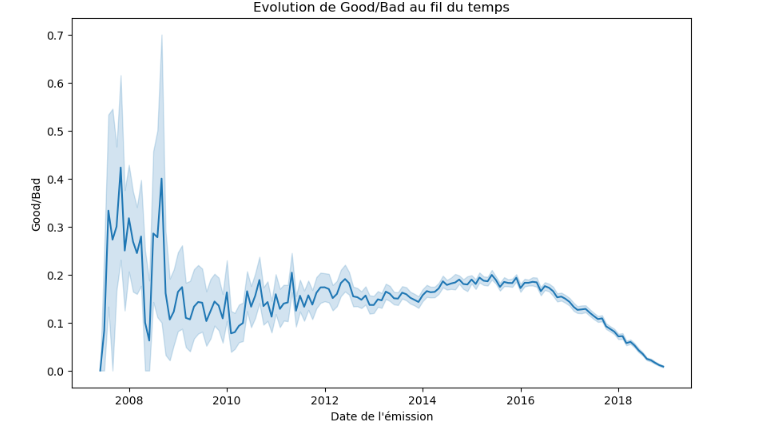


Il est normal que nous ayons 3,8% de good_bad contre 15% pour avant 2018, nous n'avons qu'à regarder la courbe des good_bad sur le temps. Ce n'est pas un problème des données.

### Accuracy and Area under the Curve

In [152]:
tr = 0.5

# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [153]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,69981,35737
1,554,3651


In [154]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.636637,0.325109
1,0.005040,0.033214


In [155]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.6698507136813951

In [156]:
from sklearn.metrics import roc_curve, roc_auc_score

In [157]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99457046, 0.99457046,
        1.        ]),
 array([0.        , 0.03543401, 0.04351962, ..., 0.99976219, 1.        ,
        1.        ]),
 array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
        3.71400681e-10, 3.67120498e-10, 1.77109264e-14]))

In [158]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

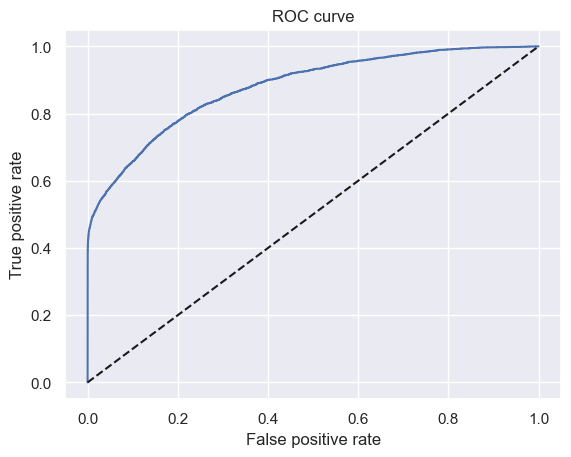

In [160]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [161]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.878974983341926

### Gini and Kolmogorov-Smirnov

In [163]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba', ascending=False)
# Sorts a dataframe by the values of a specific column.

In [164]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
23006,1,1.0,1
64795,1,1.0,1
64664,1,1.0,1
35497,1,1.0,1
92276,1,1.0,1


In [165]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
83647,0,6.961497e-14,0
64440,0,6.593321e-14,0
8124,0,5.520090e-14,0
43226,0,4.844183e-14,0
15524,0,1.771093e-14,0


In [166]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [167]:
#df_actual_predicted_probs = df_actual_predicted_probs.drop('level_0', axis=1)
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,23006,1,1.0,1
1,64795,1,1.0,1
2,64664,1,1.0,1
3,35497,1,1.0,1
4,92276,1,1.0,1


In [168]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [169]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good
0,23006,1,1.0,1,1,1,0
1,64795,1,1.0,1,2,2,0
2,64664,1,1.0,1,3,3,0
3,35497,1,1.0,1,4,4,0
4,92276,1,1.0,1,5,5,0


In [170]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [171]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,23006,1,1.0,1,1,1,0,0.000009,0.000238,0.0
1,64795,1,1.0,1,2,2,0,0.000018,0.000476,0.0
2,64664,1,1.0,1,3,3,0,0.000027,0.000713,0.0
3,35497,1,1.0,1,4,4,0,0.000036,0.000951,0.0
4,92276,1,1.0,1,5,5,0,0.000045,0.001189,0.0


In [172]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
109918,83647,0,6.961497e-14,0,109919,4205,105714,0.999964,1.0,0.999962
109919,64440,0,6.593321e-14,0,109920,4205,105715,0.999973,1.0,0.999972
109920,8124,0,5.520090e-14,0,109921,4205,105716,0.999982,1.0,0.999981
109921,43226,0,4.844183e-14,0,109922,4205,105717,0.999991,1.0,0.999991
109922,15524,0,1.771093e-14,0,109923,4205,105718,1.000000,1.0,1.000000


Text(0.5, 1.0, 'Gini')

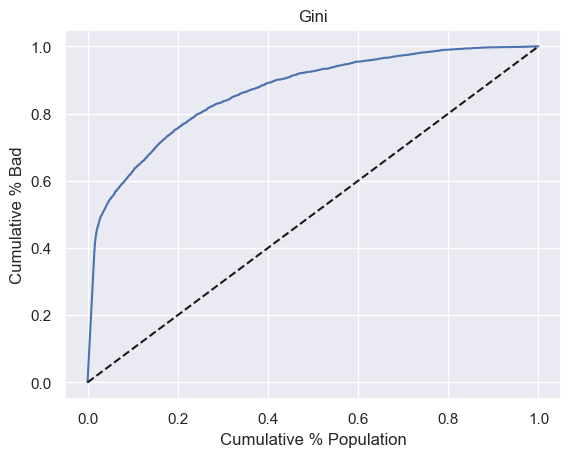

In [173]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [174]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.7579499666838521

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

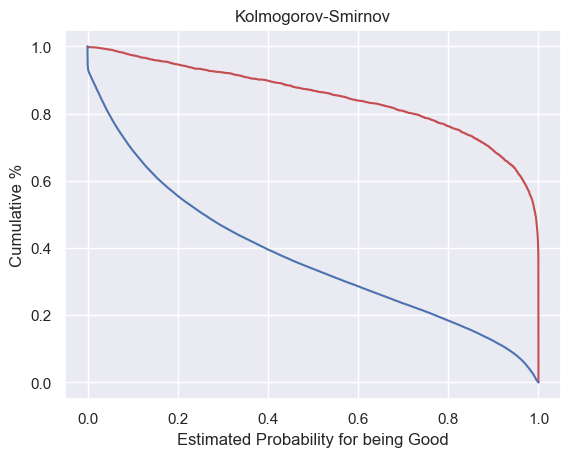

In [175]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [176]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.5805328554625806